In [2]:
import os
import json
import pandas as pd
import seaborn as sns
from web3 import Web3
from dotenv import load_dotenv
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator


load_dotenv()

True

In [3]:
# Evaluate if address is a contract

def is_contract(address:str):
    """Returns True if an Ethereum address is a contract"""
    code = w3.eth.get_code(address)
    return len(code) > 2

In [4]:
ETHERSCAN_KEY = os.getenv("ETHERSCAN_KEY")
RPC_URL = os.getenv("RPC_URL")

In [5]:
w3 = Web3(Web3.HTTPProvider(RPC_URL))

In [6]:
beacon_deposits_contract_address = "0x00000000219ab540356cBB839Cbe05303d7705Fa"
with open(os.path.join("abi", "beacon.json"), "r") as f:
    beacon_abi = json.load(f)
beacon_deposits = w3.eth.contract(beacon_deposits_contract_address, abi=beacon_abi)


lido_withdrawals_contract_address = "0x889edC2eDab5f40e902b864aD4d7AdE8E412F9B1"
with open(os.path.join("abi", "lido_withdrawals.json"), "r") as f:
    lido_withdrawals_abi = json.load(f)
lido_withdrawals = w3.eth.contract(lido_withdrawals_contract_address, abi=lido_withdrawals_abi)


In [ ]:
from_block = 11052984 # beacon deployment block
to_block = 19030241

for i in tqdm(range(from_block, to_block, 2000)):
    # retrieve logs in 2k blocks interval
    logs = beacon_deposits.events.DepositEvent().get_logs(fromBlock=i, toBlock=i+2000)
    # save results to pandas dataframe
    for log in logs:
        deposit = pd.DataFrame([{
            "block_number": log["blockNumber"],
            "depositor": pd.NA,
            "public_key": log["args"]["pubkey"],
            "withdrawal_credentials": log["args"]["withdrawal_credentials"],
            "signature": log["args"]["signature"],
            "contract (y/n)": pd.NA,
            "protocol": pd.NA,
            "amount": log["args"]["amount"],
            "tx_hash": log["transactionHash"]
            }])
        deposit.to_csv("beacon_deposits.csv", mode="a", header=False, index=False)

In [ ]:
from_block = 17172547 # lido withdrawal queue deployment block
to_block = 19030241

for i in tqdm(range(from_block, to_block, 2000)):
    # retrieve logs in 2k blocks interval
    logs = lido_withdrawals.events.WithdrawalClaimed().get_logs(fromBlock=i, toBlock=i+2000)
    # save results to pandas dataframe
    for log in logs:
        deposit = pd.DataFrame([{
            "block_number": log["blockNumber"],
            "depositor": pd.NA,
            "request_id": log["args"]["requestId"],
            "owner": log["args"]["owner"],
            "receiver": log["args"]["receiver"],
            "contract (y/n)": pd.NA,
            "protocol": pd.NA,
            "amount": log["args"]["amountOfETH"],
            "tx_hash": log["transactionHash"]
            }])
        deposit.to_csv("data/lido_withdrawals.csv", mode="a", header=False, index=False)

100%|██████████| 929/929 [01:48<00:00,  8.60it/s]


In [7]:
deposits = pd.read_csv("data/beacon_deposits.csv")
deposits.columns = ["block_number", "depositor", "public_key", "withdrawal_credentials", "signature", "contract (y/n)", "protocol", "amount", "tx_hash"]
print(deposits.size)
deposits.head()

10823292


,block_number,depositor,public_key,withdrawal_credentials,signature,contract (y/n),protocol,amount,tx_hash
0,11191448,NaN,b'\xa1\xd1\xad\x07\x14\x03SS%\x808\xe9d\xae\x9...,b'\x00\x92\xc2\x00b\xce\xe7\x03\x89\xf1\xcbO\x...,"b""\x98_6[4Y\x17m\xa47V\x037\xcc\x07M\x156c\xf6...",NaN,NaN,b'\x00\xca\x9a;\x00\x00\x00\x00',b'\xa9\x0e\xd2u!\xc0~f\xd5-\xb6\xeeG\xd7)\xd1\...
1,11191495,NaN,b'\xb2\xffG\x16\xed4[\x05\xdd\x1d\xfcjZ\x9f\xa...,b'\x00\xd6l\xf3S\x93\x15\x00\xa5L\xbd\x0b\xc5\...,"b'\xb8h""\x9d\xf2\x9f+H@\x9cZ\xacpYL\x98\x82\xb...",NaN,NaN,b'\x00\xca\x9a;\x00\x00\x00\x00',b'\x14\xf1\xd1~\xf6\x05\x11\t\xbfK\x9e]\xd9\xb...
2,11191501,NaN,b'\x8e2?\xd5\x01#<\xd4\xd1\xb9\xd6=t\x07j8\xde...,b'\x00\xd6\xb9\x1f\xbb\xce\x01Fs\x9a\xfb\x0fT\...,b'\xb9\xa4\xbc\xcco\xc9\x11\x92\xb6\x03\xdd~\x...,NaN,NaN,b'\x00\xca\x9a;\x00\x00\x00\x00',b'n\x1e0\xcbKn\x00)\xfcGb\xcft\xb2d\xcef\xa9\x...
3,11191512,NaN,b'\xa6$ T<\xee\xf8\xd7~\x06\\p\xda\x15\xf7\xb7...,"b'\x007\xca\x9a\x1c\xf2""=\x8b\x9f\x81\xa1MI7\x...",b'\xb1H\x08\x80\xe1AI3\x96\x7fPE2\xf9C\xe4%\xa...,NaN,NaN,b'\x00\xca\x9a;\x00\x00\x00\x00',b'H\xcau\x98T\xcf\x96\x0bC\xf0\xd6\xa9\x9e\xb6...
4,11191528,NaN,b'\xb2\xce\x0fy\xf9\x0e{:\x11<\xa5x<euo\x96\xc...,b'\x004Kls\xf7\x1b\x11\xc5j\xba\r\x01\xb7\xd8\...,"b""\x94\\\xaa\xf8-\x18\xe7\x8c\x039'\xd5\x1fE.\...",NaN,NaN,b'\x00@Ys\x07\x00\x00\x00',"b'@M\x8e\x10\x98""\xceD\x8eh\xf4R\x16\xc1,\xb0Q..."


In [8]:
lido_withdrawals = pd.read_csv("data/lido_withdrawals.csv")
lido_withdrawals.columns = ["block_number", "depositor", "request_id", "owner", "receiver", "contract (y/n)", "protocol", "amount", "tx_hash"]
print(lido_withdrawals.size)
lido_withdrawals.head()

193185


,block_number,depositor,request_id,owner,receiver,contract (y/n),protocol,amount,tx_hash
0,17272797,NaN,54,0xC993FefD922f6d977F76F7f0A71FEc4Dc85F7cF3,0xC993FefD922f6d977F76F7f0A71FEc4Dc85F7cF3,NaN,NaN,19759913373040720262,"b'\xb7mD\x9c\x1c\x04}\xcfF?\xf9i|,\xfaz\xf4MF%..."
1,17272834,NaN,33,0x453E8c96616FdCAD7E773946FbA811c60eB0852a,0x453E8c96616FdCAD7E773946FbA811c60eB0852a,NaN,NaN,30000000000000000000,b'\x8a\x89\x87&\xa1E\xb9\xa6\x7f\x1f\xc1h\xd8%...
2,17272834,NaN,6,0x316BDE155acd07609872a56Bc32CcfB0B13201fA,0x316BDE155acd07609872a56Bc32CcfB0B13201fA,NaN,NaN,1000000000000000,"b']\xaax,\xe1\xb5\x80\x8d\xa9^\xe5\xb3\\E\x86\..."
3,17272843,NaN,43,0x89d568B136F50305b476a0478A69947f546C7911,0x89d568B136F50305b476a0478A69947f546C7911,NaN,NaN,10906256133095508354,b'\xef\x88\x03\xb7\xbb\x1e\x06\x0e\xa8#\x8b\xe...
4,17272867,NaN,42,0x5c3c4faF96DA5cD480d92fEBf2AC3ec39ecB1f79,0x5c3c4faF96DA5cD480d92fEBf2AC3ec39ecB1f79,NaN,NaN,100000000000000,b'\xbb\x8d\xf0\x97\x80\xc8R\x8aX$\xab?\xbd\xa3...


In [9]:
lido_withdrawals["contract (y/n)"] = lido_withdrawals["receiver"].apply(is_contract)

KeyboardInterrupt: 

Text(0.5, 1.0, 'Histogram of Receiver Address Withdrawal Frequency')

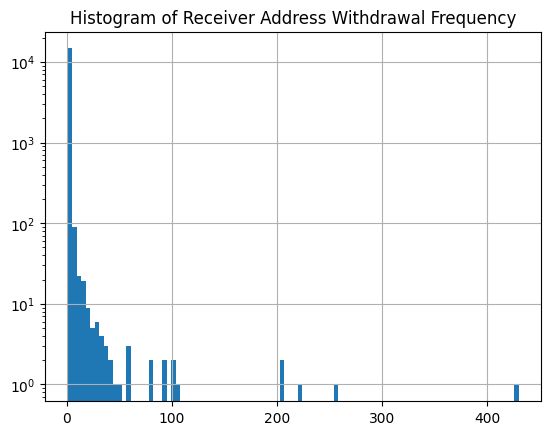

In [10]:
ax = lido_withdrawals["receiver"].value_counts().hist(bins=100)
ax.set_yscale("log")
ax.set_title("Histogram of Receiver Address Withdrawal Frequency") #TODO better title and axes titles

In [22]:
top_receivers = lido_withdrawals[["receiver", "amount"]]
top_receivers["amount"] = top_receivers["amount"].astype(float) / 1e18
top_receivers = top_receivers.groupby("receiver").sum().reset_index()
top_receivers = top_receivers.sort_values(by="amount", ascending=False).head(20)
top_receivers["receiver"].value_counts()

# Overwrite addresses with names from Etherscan (if available)
top_receivers.at[7423, "receiver"] = "Maker Vault Owner"
top_receivers.at[5116, "receiver"] = "onethousand.eth"
top_receivers.at[1440, "receiver"] = "Justin Sun 4"
top_receivers.at[6643, "receiver"] = "SwissBorg 7"
top_receivers.at[14242, "receiver"] = "smartestmoney.eth"

top_receivers

/var/folders/1r/k6vlr74j5_j3ftfp83kg694m0000gn/T/ipykernel_88082/2704923901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_receivers["amount"] = top_receivers["amount"].astype(float) / 1e18


,receiver,amount
4339,0x4A87EcDfb459eb36d25226D9CCd7Ec4f684AB3Fc,428084.601592
7423,Maker Vault Owner,250520.278616
2019,0x2178e1d614FEFb2B304DB58f07116d89f948Fda1,161881.118099
7036,0x77FC6E36d82010B2263b76959720e9Ee2C947467,161011.165881
995,0x0f1DfeF1a40557d279d0de6E49aB306891A638b8,104255.647376
10077,0xBCb742AAdb031dE5de937108799e89A392f07df1,80251.291344
5116,onethousand.eth,72877.857044
10054,0xBBE3188a1e6Bfe7874F069a9164A923725B8Bd68,72046.872495
4379,0x4C09DD7c598b12c781C4B5d74D245a1784a2E148,69214.828233
11252,0xE3Ece6502d0A4c2593252607B5C8f93153145b90,59286.523460


/var/folders/1r/k6vlr74j5_j3ftfp83kg694m0000gn/T/ipykernel_88082/139777714.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(abbreviated_labels)


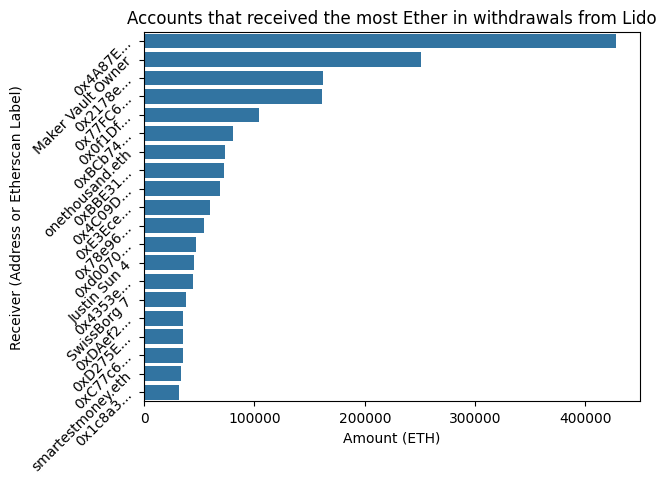

In [20]:
ax = sns.barplot(data=top_receivers, y="receiver", x="amount", orient="h")

plt.title("Accounts that received the most Ether in withdrawals from Lido")
plt.xlabel("Amount (ETH)")
plt.ylabel("Receiver (Address or Etherscan Label)")
# plt.xscale("log")
plt.yticks(rotation=45)
# Abbreviate long labels with ellipses
abbreviated_labels = [label[:7] + '...' if "0x" in label else label for label in top_receivers['receiver']]
plt.gca().set_yticklabels(abbreviated_labels)
# Set the tick interval on the x-axis
tick_interval = 100000  # Adjust the interval as needed
plt.gca().xaxis.set_major_locator(MultipleLocator(base=tick_interval))